In [13]:
#description: create neural network from scratch that takes any number of layer and nuron in each layer

#import libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x = np.linspace(-3, 5, 500)
y = 1 / (1 + np.exp(-x)) + 1 / (1 + np.exp(-(3 - x)))
y = np.sin(x) + 1 / (1 + np.exp(-x))
y = 1 / (1 + np.exp(-x)) + 1 / (1 + np.exp(-(3 - x))) + 1 / (1 + np.exp(-(x + 3)))
y = 1 / (1 + np.exp(-2 * x)) + 1 / (1 + np.exp(-(3 - x)))
y = np.sin(x) + np.random.normal(0, 0.2, 500) 
y= x*2


#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=300, random_state=10)

#reshape data
X_train = x_train.reshape(1, -1)
Y_train = y_train.reshape(1, len(y_train))
X_test = x_test.reshape(1, len(x_test))
Y_test = y_test.reshape(1, len(y_test))






In [14]:
#initialize parameters for neural network
def initialize_parameters(Architecture):
    b_list=[]
    w_list=[]
    np.random.seed(3)
    for i in range(1,len(Architecture)):
        b_list.append(np.random.rand(Architecture[i], 1))
        #print(f"b{i}={Architecture[i]},1")

        w_list.append(np.random.rand(Architecture[i], Architecture[i-1]))
        #print(f"w{i}={Architecture[i]},{Architecture[i-1]}")
        
    return b_list, w_list



In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def linear(x):
    return x
def linear_derivative(x):
    return 1

def loss_function(y, y_hat):
    return (1/len(y)) * np.sum((y-y_hat)**2)
def loss_derivative(y, y_hat):
    return ((2/len(y)) * (y_hat-y))

#softmax input->exponentiate-->Normalize-->output 
#axis=0 the sum of column
#
def softmax(x):
    #overflow prevention x = x - max(x) because the exp
    exp_x = np.exp(x - np.max(x))  
    #normlize
    return exp_x / exp_x.sum(axis=0)

def softmax_derivative(x):
    softmax_x = softmax(x)
    return softmax_x * (1 - softmax_x)

def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)


def cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # Small constant to prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid numerical issues
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)
def binary_cross_entropy_loss_derivative(y_true, y_pred):
    epsilon = 1e-15  # Small constant to prevent division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid numerical issues
    derivative = (y_pred - y_true) / (y_pred * (1 - y_pred))
    return derivative



In [16]:
def forward_propagation(X, b_list, w_list, activation):
    n_layers=len(b_list)
    z_list=[]
    a_list=[X] #input 
    
    for i in range(n_layers):
        #print(f"z{i+1} = W{i+1} @ a{i} + B{i+1} ")
        z_list.append(w_list[i]@a_list[i]+b_list[i])
        
        if activation[i]=="sigmoid":
            #print(f"a{i+1} = sigmid(z{i+1})")
            a_list.append(sigmoid(z_list[i]))
            
        elif activation[i]=="linear":
            #print(f"a{i+1} = linear(z{i+1})")
            a_list.append(linear(z_list[i]))
            
        elif activation[i]=="softmax":
            #print(f"a{i+1} = softmax(z{i+1})")
            a_list.append(softmax(z_list[i]))
            
        elif activation[i]=="relu":
            #print(f"a{i+1} = relu(z{i+1})")
            a_list.append(relu(z_list[i]))
            
    return a_list, z_list




In [17]:
def backpropagation(Y, a_list, z_list, w_list, b_list,activation):
    n_layers = len(a_list) - 1  # Minus 1 because we do not include the input layer

    dw_list = [0] * n_layers
    db_list = [0] * n_layers
    
    da = loss_derivative(Y, a_list[-1])
    for i in reversed(range(n_layers)):
        #print(i)
        if activation[i] == "sigmoid":
            #print(activation[i])
            da = da * sigmoid_derivative(z_list[i])
        elif activation[i] == "linear":
            da = da * linear_derivative(z_list[i])
        elif activation[i] == "softmax":
            da = da * softmax_derivative(z_list[i])
        elif activation[i] == "relu":
            da = da * relu_derivative(z_list[i])

            
        #print(da.shape)
        dw = da @ a_list[i].T / Y.size
        db = np.sum(da, axis=1, keepdims=True) / Y.size
        da =  w_list[i].T @ da
        #print(db)

        
        dw_list[i] = dw
        db_list[i] = db
        
    return dw_list, db_list
        
    


In [20]:
Architecture=[1,1,1]  #fisrt index is the number of input data
activation=["relu","linear"]
learning_rate=0.01
itr = 10000

def train(X_train, Y_train, Architecture, activation,itr=10000, learning_rate=0.01 ):
    b_list, w_list=initialize_parameters(Architecture)
    lossx_plot=[]
    lossy_plot=[]
    loss_1, loss = 5,3
    
    for i in range(itr):
        a_list, z_list=forward_propagation(X_train, b_list, w_list, activation)  
        dw_list, db_list= backpropagation(Y_train, a_list, z_list, w_list, b_list,activation)
        if loss == loss_1:
            print(f"Converige at {loss}")
            break
        loss_1 = loss
        for j in range(len(w_list)):
            w_list[j] -= learning_rate * dw_list[j]
            b_list[j] -= learning_rate * db_list[j]
            loss = loss_function(Y_train, a_list[-1])
            lossy_plot.append(loss)
            lossx_plot.append(i)
            
        if i % (itr/10) == 0:
            print(loss)
            

    return b_list, w_list,lossx_plot, lossy_plot
    
b_list, w_list,lossx_plot ,lossy_plot = train(X_train, Y_train, Architecture, activation,itr, learning_rate)
            
def test(X_test,b_list, w_list,activation):
    a_list, z_list=forward_propagation(X_test, b_list, w_list,activation)
    return z_list[-1]
    
Y_hat = test(X_test,b_list, w_list,activation )


5152.93963408694
16.978895084234278
2.3901744011415644
0.796592730531366
0.36246744568840344
0.19046389235578526
0.10991578280800021
0.06661655239135313
0.043106544833954805
0.02988710489799086


<Figure size 640x480 with 0 Axes>

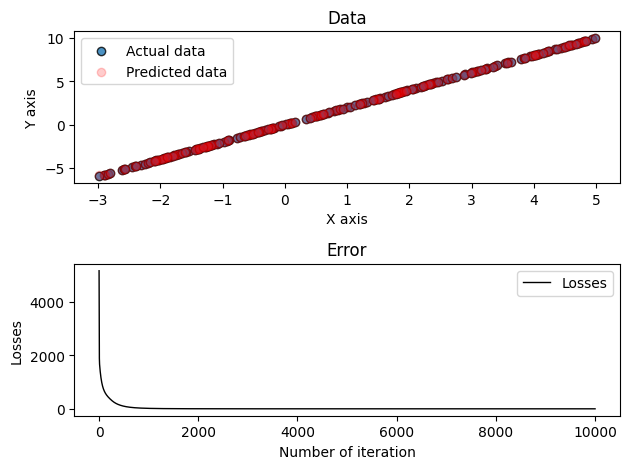

In [21]:
plt.figure()

fig, axes = plt.subplots(nrows= 2, ncols=1) #figsize=(30,30)

axes[0].set_title("Data")
axes[0].set_xlabel("X axis")
axes[0].set_ylabel("Y axis") 

axes[1].set_title("Error")
axes[1].set_xlabel("Number of iteration") 
axes[1].set_ylabel("Losses") 

axes[0].scatter(X_test,Y_test, label= "Actual data",alpha=0.8, edgecolor='black', linewidth=1 )
axes[0].scatter(X_test,Y_hat,c="r", label= "Predicted data", linewidth=1,alpha=0.2)

axes[1].plot(lossx_plot, lossy_plot,color="black", label = "Losses", linewidth=1)


axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show() 